In [1]:
import sys,os,scipy,glob,pickle

In [2]:
from pylab import *

In [3]:
from astropy import units as un

In [4]:
import ccdproc

In [5]:
from strolger_util import util as u

In [6]:
os.chdir('APO_Data/APO-10-27-17/Q4JH07/UT171028/')

In [7]:
im1=ccdproc.CCDData.read('bias.0074.fits',unit='adu')

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [8]:
print(im1)

[[ 314  310 4238 ...,  326  326  328]
 [ 312  306  338 ...,  342  337  340]
 [ 324  320  350 ...,  346  345  345]
 ..., 
 [ 326  324  382 ...,  346  347  348]
 [ 326  326  382 ...,  347  348  348]
 [ 330  330  382 ...,  349  349  351]]


In [9]:
lbin=arange(0.,10.,0.1)

In [10]:
ax=subplot(111)

In [11]:
N,bins,j1=ax.hist(array(im1).flatten(),bins=10**(lbin),log=True)

In [12]:
ax.set_xscale('log')

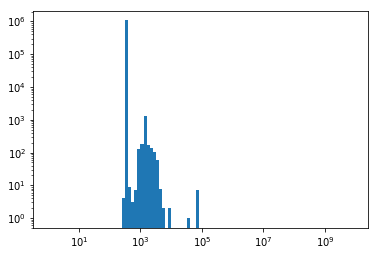

In [13]:
show()

In [14]:
print(u.binmode(array(im1).flatten()))

(352.1399999999993, array(<zip object at 0x7f195c411148>, dtype=object))


In [15]:
tmp_log={'overscan':'overscan region[:,1029:1050] subtracted','calstat':'O'}

In [17]:
from astropy.modeling import models

In [18]:
poly_model = models.Polynomial1D(3)

In [19]:
no_scan=ccdproc.subtract_overscan(im1,overscan=im1[:,1029:1050],add_keyword=tmp_log,model=poly_model)

In [20]:
ax1=subplot(121)

In [21]:
ax2=subplot(122)

In [22]:
N,bins,j1=ax1.hist(array(no_scan).flatten(),bins=10**(lbin),log=True)

In [23]:
ax1.set_xscale('log')

In [24]:
ax2.imshow(no_scan,cmap='gray',vmin=-0.3,vmax=10)

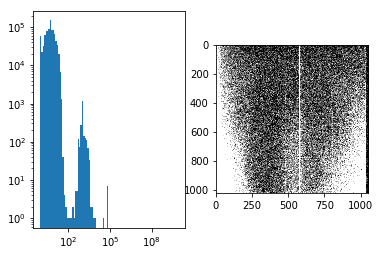

In [25]:
show()

In [26]:
print(u.binmode(array(no_scan).flatten()))

(3.358571428571453, array(<zip object at 0x7f1187c70308>, dtype=object))


In [34]:
tmp_log={'trim':'trim region[:,:1024]','calstat':'T'}

In [35]:
trimmed = ccdproc.trim_image(no_scan[:,:1024],add_keyword=tmp_log)

In [36]:
print(trimmed.shape)

(1024, 1024)


In [37]:
ax=subplot(111)

In [38]:
ax.imshow(trimmed,cmap='gray',vmin=-0.3,vmax=10)

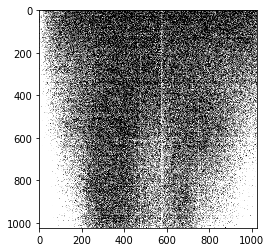

In [39]:
show()